In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.style'] = 'italic'

blues = ['#03045e', '#0077b6', '#00b4d8', '#90e0ef']
reds = ['#6a040f', '#dc2f02', '#f48c06', '#ffba08']

In [92]:
# Define some potentials

def lj(e, s, r):
    return(4*e * ((s/r)**12 - (s/r)**6))

def morse(d, a, dr):
    return(d*(1-np.exp(-a*(dr)))**2)

kB = 8.31446261815324 #J/KMol

def mb(v, m, T):
    return ((m/1000)/(2*np.pi*kB*T))**(3/2) * (4*np.pi*(v**2)) * np.exp(-((m/1000)*(v**2))/(2*kB*T)) #have to divide molar mass by 1000 to get kg

def mb_cdf(v, m, T):
    a = np.sqrt(kB*T/(m/1000))
    return erf(v/(np.sqrt(2) * a)) - np.sqrt(2/np.pi)*(v/a)*np.exp(-(v**2)/(2*a**2))

# There is no analytic form of the mb_cdf^-1...

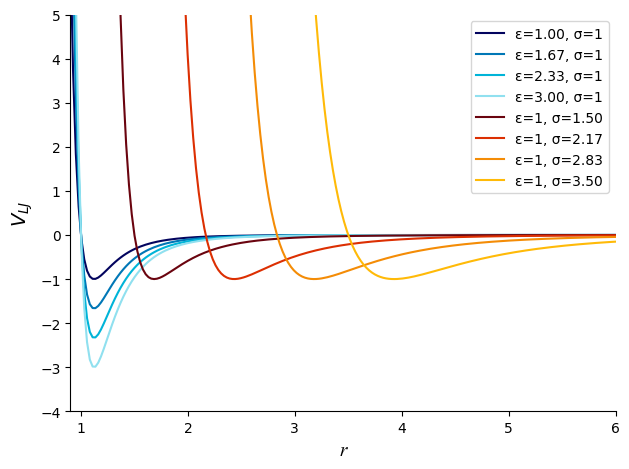

In [68]:
#plot LJ

fig, ax = plt.subplots()
x = np.linspace(0.9, 6.1, 200)
espace = np.linspace(1, 3, 4)
sspace = np.linspace(1.5, 3.5, 4)
for i, e in enumerate(espace):    
    y = lj(e, 1, x)
    ax.plot(x, y, label=f'ε={e:.2f}, σ=1', c=blues[i])

for i, s in enumerate(sspace):
    y = lj(1, s, x)
    ax.plot(x, y, label=f'ε=1, σ={s:.2f}', c=reds[i])

ax.set_xlim(0.9, 6.0)
ax.set_ylim(-4, 5)

text_params = {'fontname':'Times New Roman', 'fontstyle':'italic', 'fontsize':14}
ax.set_xlabel('r', **text_params)
ax.set_ylabel('$V_{LJ}$', **text_params)

ax.spines[['top', 'right']].set_visible(False)

plt.legend()

plt.tight_layout()
plt.savefig('lj.png', dpi=300)

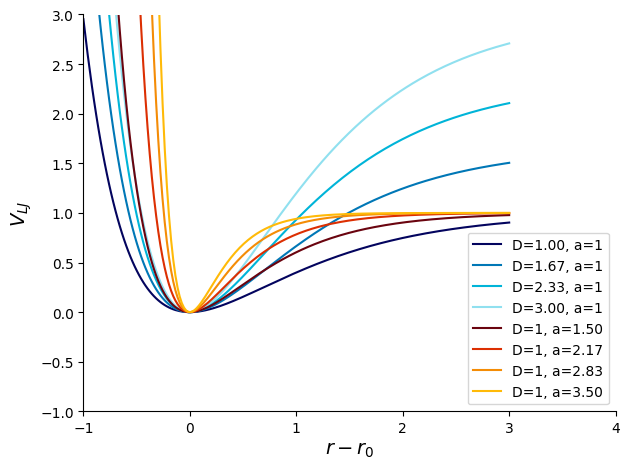

In [69]:
# Plot morse
fig, ax = plt.subplots()
x = np.linspace(-1, 3, 200)
dspace = np.linspace(1, 3, 4)
aspace = np.linspace(1.5, 3.5, 4)
for i, d in enumerate(dspace):    
    y = morse(d, 1, x)
    ax.plot(x, y, label=f'D={d:.2f}, a=1', c=blues[i])

for i, a in enumerate(aspace):
    y = morse(1, a, x)
    ax.plot(x, y, label=f'D=1, a={a:.2f}', c=reds[i])

ax.set_xlim(-1, 4.0)
ax.set_ylim(-1, 3)

text_params = {'fontname':'Times New Roman', 'fontstyle':'italic', 'fontsize':14}
ax.set_xlabel('$r-r_{0}$', **text_params)
ax.set_ylabel('$V_{LJ}$', **text_params)

ax.spines[['top', 'right']].set_visible(False)

plt.legend()

plt.tight_layout()
plt.savefig('morse.png', dpi=300)

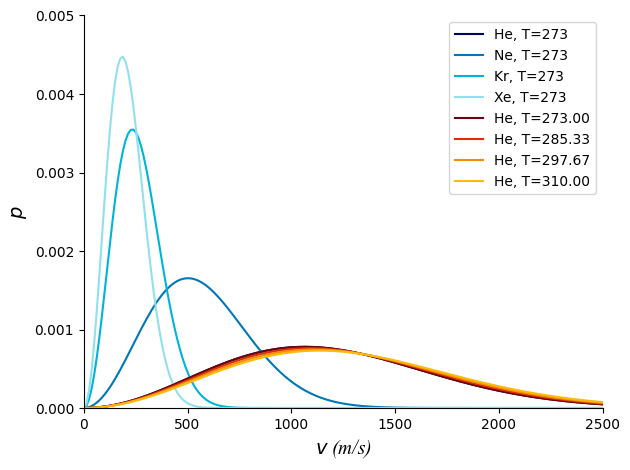

In [84]:
# Plot MB distribution
fig, ax = plt.subplots()
x = np.linspace(0, 2500, 200)
mspace = np.array([4, 18, 83, 132])
mnames = ['He', 'Ne', 'Kr', 'Xe']
Tspace = np.linspace(273, 310, 4)
for i, m in enumerate(mspace):    
    y = mb(x, m, 273)
    ax.plot(x, y, label=f'{mnames[i]}, T=273', c=blues[i])

for i, t in enumerate(Tspace):    
    y = mb(x, 4, t)
    ax.plot(x, y, label=f'{mnames[0]}, T={t:.2f}', c=reds[i])


ax.set_xlim(0, 2500)
ax.set_ylim(0, 0.005)

text_params = {'fontname':'Times New Roman', 'fontstyle':'italic', 'fontsize':14}
ax.set_xlabel('$v$ (m/s)', **text_params)
ax.set_ylabel('$p$', **text_params)

ax.spines[['top', 'right']].set_visible(False)

plt.legend()

plt.tight_layout()
plt.savefig('mb.png', dpi=300)

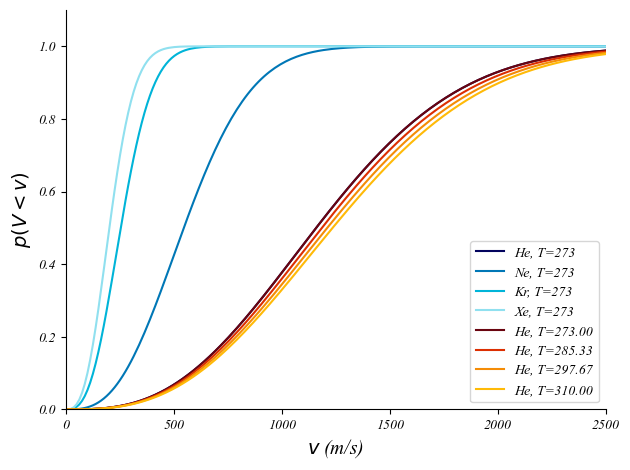

In [95]:
# Plot MB cdfs
fig, ax = plt.subplots()
x = np.linspace(0, 2500, 200)
mspace = np.array([4, 18, 83, 132])
mnames = ['He', 'Ne', 'Kr', 'Xe']
Tspace = np.linspace(273, 310, 4)
for i, m in enumerate(mspace):    
    y = mb_cdf(x, m, 273)
    ax.plot(x, y, label=f'{mnames[i]}, T=273', c=blues[i])

for i, t in enumerate(Tspace):    
    y = mb_cdf(x, 4, t)
    ax.plot(x, y, label=f'{mnames[0]}, T={t:.2f}', c=reds[i])

ax.set_xlim(0, 2500)
ax.set_ylim(0, 1.1)

text_params = {'fontname':'Times New Roman', 'fontstyle':'italic', 'fontsize':14}
ax.set_xlabel('$v$ (m/s)', **text_params)
ax.set_ylabel('$p(V<v)$', **text_params)

ax.spines[['top', 'right']].set_visible(False)

plt.legend()

plt.tight_layout()
plt.savefig('mb_cdf.png', dpi=300)